In [250]:
ClearAll["Global`*"];
{brown,green,beige,blue}=RGBColor/@{"#640125","#6e7955","#cbb994","#165e83"};
<<"MaTeX`";

(* parameters *)
nu=1. (* heat conductivity *);
SimTime=480.;
BoxSize=128;
{tMin,tMax}={0,SimTime} (* time *);
{xMin,xMax}={-BoxSize/2.,BoxSize/2.} (* x coordinate *);
xgr=128;dx=BoxSize/(xgr-1);
tgr=2048;dt=SimTime/(tgr-1);
std=0.3; (* sigma of the random variable *)

-Graphics-
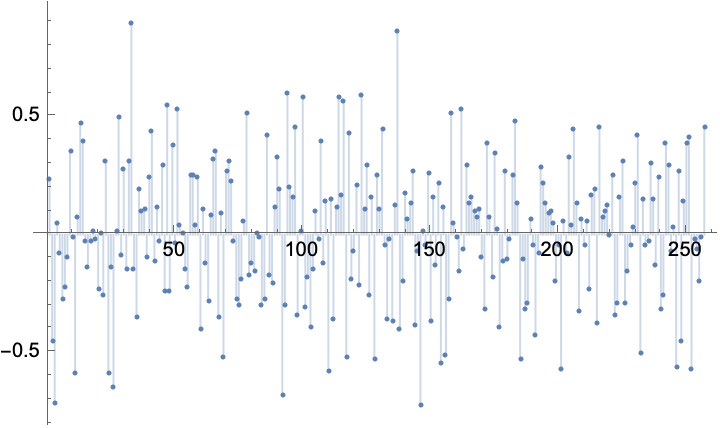

In [113]:
(* Initial conditions NO NEED TO RUN THIS EVERY TIME *)
Xi=RandomFunction[WhiteNoiseProcess[std],{1,2*xgr+1}];
ListPlot[Xi,Filling->Axis]
(* To obtain values, run Xi["Values"][[i]], i=1,...,2*xgr+1 *)

In [115]:
logphiinidata[n_]:=Xi["Values"][[2*xgr+1]]+Sum[Xi["Values"][[i]]*Sin[2*Pi*i*n/(xgr-1)]+Xi["Values"][[i+xgr]]*Cos[2*Pi*i*n/(xgr-1)],{i,1,5}]
data=Array[logphiinidata[#-1]&,xgr];
Export["logphiini_100_01_001.dat",data]; (* _xgr_sigma_ID *)

Syntax::stresc: Unknown string escape \p.

Syntax::stresc: Unknown string escape \p.

-Graphics-
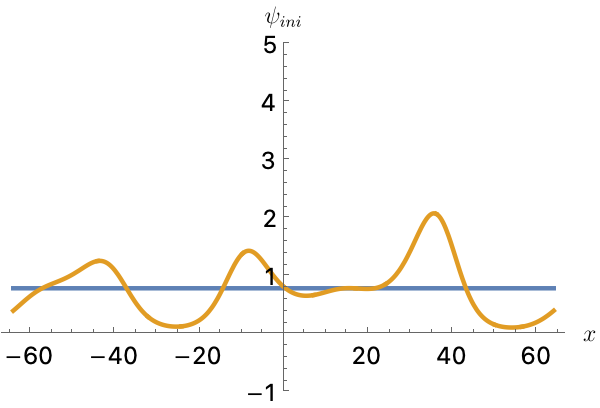

In [125]:
Clear[itpphiini,hom]
dataimp=Import["logphiini_100_01_001.dat"];
dataimpext=Append[dataimp,dataimp[[1]]];
itpimpdata=Interpolation[Table[{j,dataimpext[[j]]},{j,xgr}],InterpolationOrder->3];
itpphiini[x_?NumericQ]:=Exp[-itpimpdata[(x-xMin)/dx+1][[1]]];
hom=Sum[itpphiini[i/32],{i,xMin*32,xMax*32}]/32/BoxSize;

thickness=0.04;colorIni=gray;colorFin=sora;
graph1=Plot[{hom,itpphiini[x]},{x,xMin,xMax},AxesLabel->MaTeX[{"x","\psi_{ini}"}],BaseStyle->{FontSize->12,FontFamily->"Latin Modern Roman"},ImageSize->300,PlotRange->{-1,5},PlotStyle->{{Thickness[thickness/5],sakura},{Thickness[thickness/5],aomidori}}]

1
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[--], AbsoluteThickness[2], 
                                                            90
 
>       RGBColor[0.392157, 0.00392157, 0.145098]], 
 
                           1
>      Directive[PointSize[--], AbsoluteThickness[2], 
                           90
 
>       RGBColor[0.431373, 0.47451, 0.333333]], 
 
                           1
>      Directive[PointSize[--], AbsoluteThickness[2], 
                           90
 
>       RGBColor[0.796078, 0.72549, 0.580392]]}, {τ=0, τ=50, τ=240}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True}, LabelStyle -> {}, LegendLayout -> Column], 
 
>    {Right, Top}, Identity]]
phi2.pdf
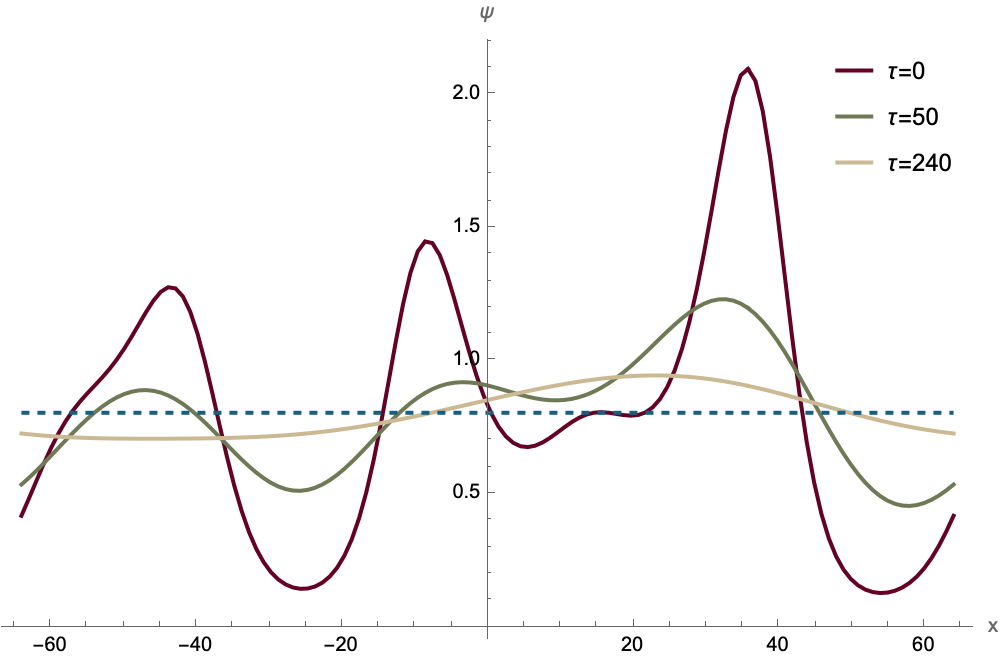
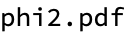

In [ ]:
xGrid=Range[xMin,xMax,dx];
phi0={};
For[i=1,i<=xgr,i++,
  AppendTo[phi0,itpphiini[xGrid[[i]]]]
];
phi=phi0;
results={phi};

For[t=1,t<=tgr,t++,
  phiNew=phi;
  For[i=2,i<=xgr-1,i++,
    phiNew[[i]]=phi[[i]]+nu*dt/dx^2*(phi[[i-1]]-2*phi[[i]]+phi[[i+1]]);
  ];
  phiNew[[1]]=phi[[1]]+nu*dt/dx^2*(phi[[xgr-1]]-2*phi[[1]]+phi[[2]]);
  phiNew[[xgr]]=phiNew[[1]];
  phi=phiNew;
  AppendTo[results,phi];
];

graph2=ListLinePlot[{results[[1]],results[[213]],results[[1024]]},DataRange->{xMin,xMax},PlotRange->All,PlotStyle->{brown,green,beige},ImageSize->500,PlotLegends->Placed[LineLegend[{"\[Tau]=0","\[Tau]=50","\[Tau]=240"}],{Right,Top}],
 AxesLabel->{"x","\[Psi]"}];
graph22=Plot[hom,{x,xMin,xMax},AxesLabel->{"x",Subscript["\[Psi]","ini"]},BaseStyle->{FontSize->12,FontFamily->"Latin Modern Roman"},ImageSize->500,PlotRange->{-1,5},PlotStyle->{Dashed,blue}];

Show[graph2,graph22]
Export["phi2.pdf",%]


1
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[--], AbsoluteThickness[2], 
                                                            90
 
>       FontSize -> 12, FontFamily -> Latin Modern Roman, 
 
>       RGBColor[0.392157, 0.00392157, 0.145098]], 
 
                           1
>      Directive[PointSize[--], AbsoluteThickness[2], FontSize -> 12, 
                           90
 
>       FontFamily -> Latin Modern Roman, RGBColor[0.431373, 0.47451, 0.333333]], 
 
                           1
>      Directive[PointSize[--], AbsoluteThickness[2], FontSize -> 12, 
                           90
 
>       FontFamily -> Latin Modern Roman, RGBColor[0.796078, 0.72549, 0.580392]]}, 
 
>     {τ=0, τ=50, τ=240}, LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True}, LabelStyle -> {}, LegendLayout -> Column], 
 
>    {Right, Top}, Identity]]
-Graphics-
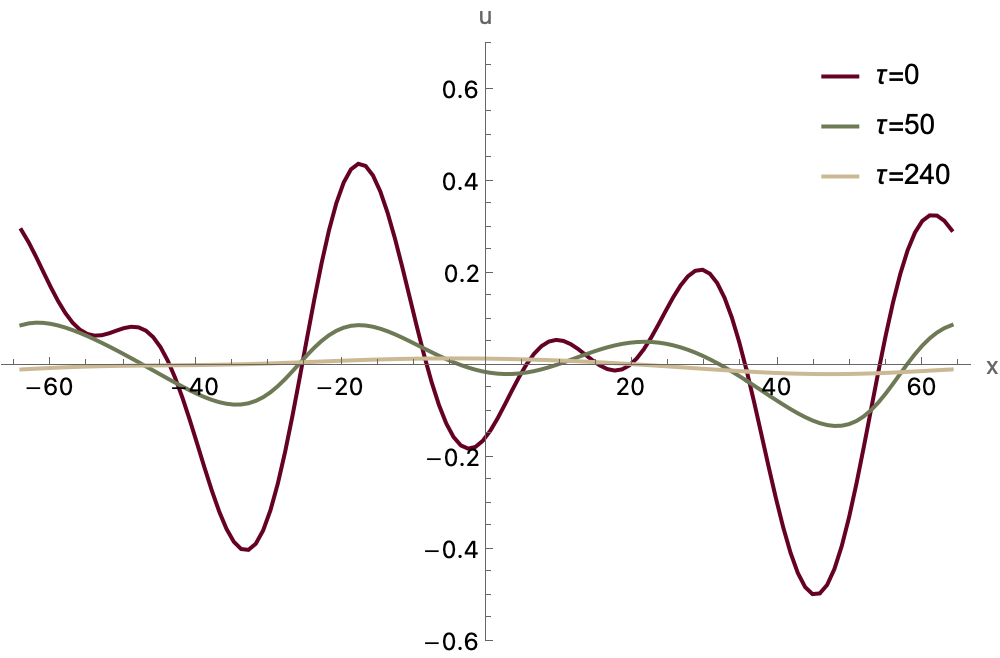
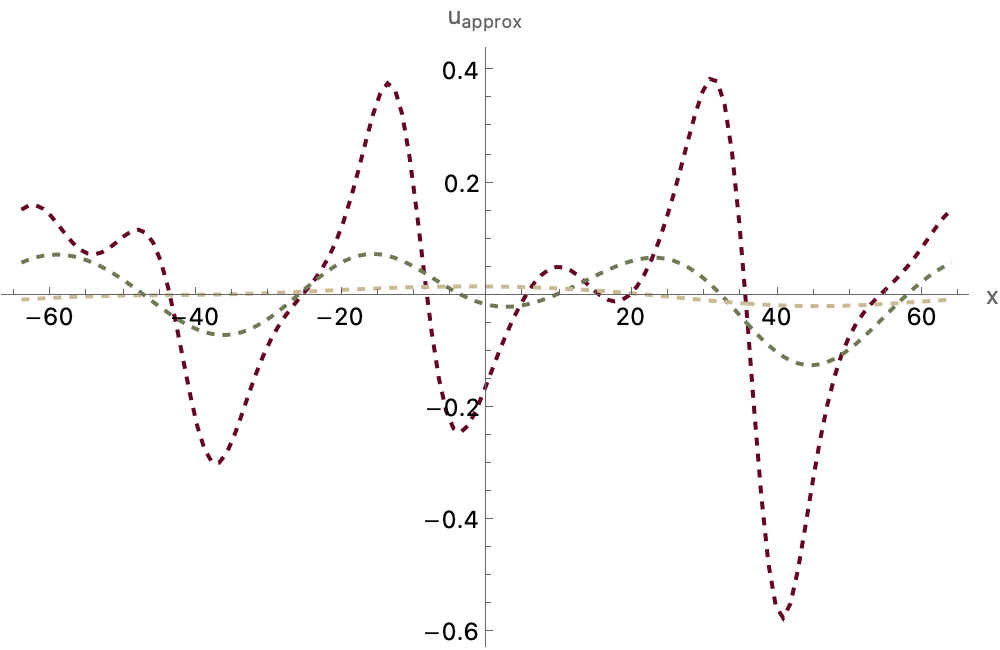

In [218]:
u0={};
approxu0={};
AppendTo[u0,(nu*xgr/BoxSize)*(results[[1]][[2]]-results[[1]][[xgr-1]])/results[[1]][[1]]];
AppendTo[approxu0,(nu*xgr/BoxSize)*(results[[1]][[2]]-results[[1]][[xgr-1]])/hom];
For[i=2,i<=xgr-1,i++,
  AppendTo[u0,(nu*xgr/BoxSize)*(results[[1]][[i+1]]-results[[1]][[i-1]])/results[[1]][[i]]];
  AppendTo[approxu0,(nu*xgr/BoxSize)*(results[[1]][[i+1]]-results[[1]][[i-1]])/hom];
];
AppendTo[u0,(nu*xgr/BoxSize)*(results[[1]][[2]]-results[[1]][[xgr-1]])/results[[1]][[xgr]]];
AppendTo[approxu0,(nu*xgr/BoxSize)*(results[[1]][[2]]-results[[1]][[xgr-1]])/hom];
u=u0;
approxu=approxu0;
uresults={u};
approxuresults={approxu};

For[t=1,t<=tgr,t++,
  uNew=u;
  approxuNew=approxu;
  uNew[[1]]=(nu*xgr/BoxSize)*(results[[t]][[2]]-results[[t]][[xgr-1]])/results[[t]][[1]];
  approxuNew[[1]]=(nu*xgr/BoxSize)*(results[[t]][[2]]-results[[t]][[xgr-1]])/hom;
  For[i=2,i<=xgr-1,i++,
    uNew[[i]]=(nu*xgr/BoxSize)*(results[[t]][[i+1]]-results[[t]][[i-1]])/results[[t]][[i]];
    approxuNew[[i]]=(nu*xgr/BoxSize)*(results[[t]][[i+1]]-results[[t]][[i-1]])/hom;
  ];
  uNew[[xgr]]=(nu*xgr/BoxSize)*(results[[t]][[2]]-results[[t]][[xgr-1]])/results[[t]][[xgr]];
  approxuNew[[xgr]]=(nu*xgr/BoxSize)*(results[[t]][[2]]-results[[t]][[xgr-1]])/hom;
  u=uNew;
  approxu=approxuNew;
  AppendTo[uresults,u];
  AppendTo[approxuresults,approxu];
];

graph3=ListLinePlot[{uresults[[1]],uresults[[213]],uresults[[1024]]},DataRange->{xMin,xMax},PlotRange->{-0.6,0.7},ImageSize->500,PlotStyle->{brown,green,beige},PlotLegends->Placed[LineLegend[{"\[Tau]=0","\[Tau]=50","\[Tau]=240"}],{Right,Top}],
 AxesLabel->{"x","u"},BaseStyle->{FontSize->12,FontFamily->"Latin Modern Roman"}]
graph4=ListLinePlot[{approxuresults[[1]],approxuresults[[213]],approxuresults[[1024]]},DataRange->{xMin,xMax},PlotRange->All,ImageSize->500,PlotStyle->{{Dashed,brown},{Dashed,green},{Dashed,beige}}, 
 AxesLabel->{"x",Subscript["u","approx"]},BaseStyle->{FontSize->12,FontFamily->"Latin Modern Roman"}]

1
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[--], AbsoluteThickness[2], 
                                                            90
 
>       FontSize -> 12, FontFamily -> Latin Modern Roman, 
 
>       RGBColor[0.392157, 0.00392157, 0.145098]], 
 
                           1
>      Directive[PointSize[--], AbsoluteThickness[2], FontSize -> 12, 
                           90
 
>       FontFamily -> Latin Modern Roman, RGBColor[0.431373, 0.47451, 0.333333]], 
 
                           1
>      Directive[PointSize[--], AbsoluteThickness[2], FontSize -> 12, 
                           90
 
>       FontFamily -> Latin Modern Roman, RGBColor[0.796078, 0.72549, 0.580392]]}, 
 
>     {τ=0, τ=50, τ=240}, LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True}, LabelStyle -> {}, LegendLayout -> Column], 
 
>    {Right, Top}, Identity]]
u2.pdf
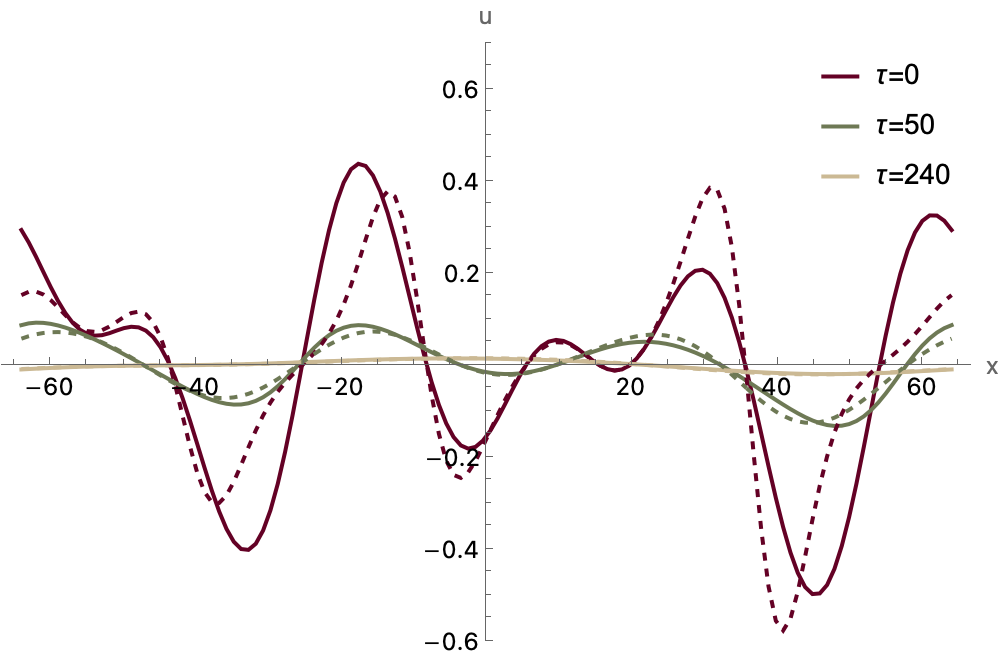
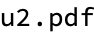

In [220]:
Show[graph3,graph4]
Export["u2.pdf",%]

-Graphics-
-Graphics-
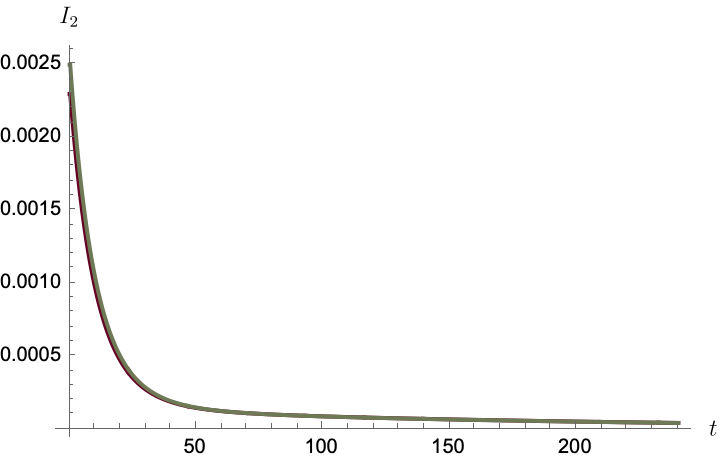
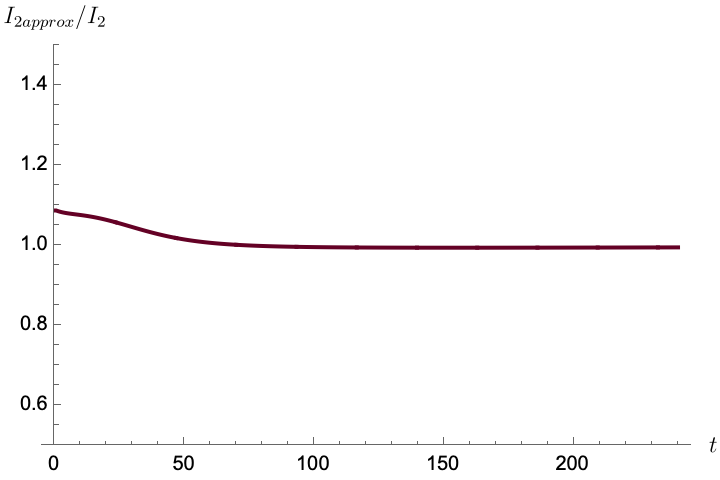

In [48]:
I2={};
approxI2={};
ratioI2={};
For[t=1,t<=tgr,t++,
  AppendTo[I2,{t*dt,Sum[uresults[[t]][[i]]^2,{i,1,xgr}]/xgr}];
  AppendTo[approxI2,{t*dt,Sum[approxuresults[[t]][[i]]^2,{i,1,xgr}]/xgr}];
  AppendTo[ratioI2,{t*dt,Sum[approxuresults[[t]][[i]]^2,{i,1,xgr}]/Sum[uresults[[t]][[i]]^2,{i,1,xgr}]}]
];

graph5=ListLinePlot[{I2,approxI2},DataRange->{tMin,tMax},PlotRange->All,PlotStyle->{brown,green},
 AxesLabel->MaTeX[{"t","I_2"}]]
graph6=ListLinePlot[ratioI2,DataRange->{tMin,tMax},PlotRange->{0.5,1.5},PlotStyle->brown,
 AxesLabel->MaTeX[{"t","I_{2{approx}}/I_2"}]]

-Graphics-
-Graphics-
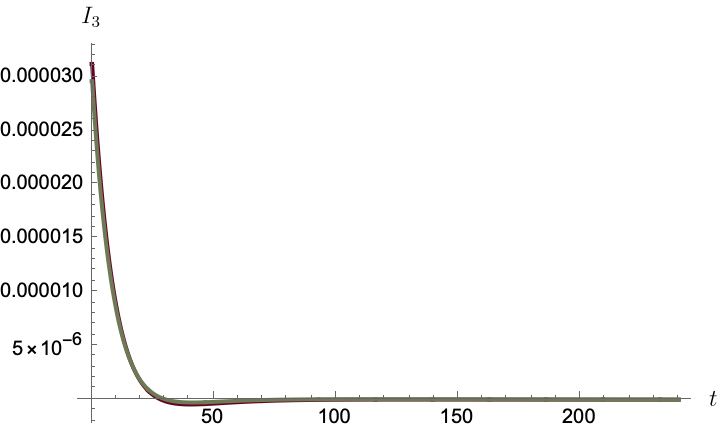
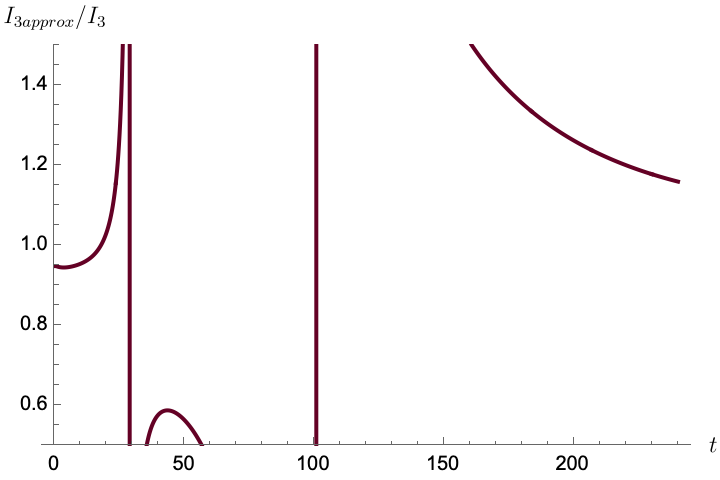

In [54]:
I3={};
approxI3={};
ratioI3={};
For[t=1,t<=tgr,t++,
  AppendTo[I3,{t*dt,Sum[uresults[[t]][[i]]^3,{i,1,xgr}]/xgr}];
  AppendTo[approxI3,{t*dt,Sum[approxuresults[[t]][[i]]^3,{i,1,xgr}]/xgr}];
  AppendTo[ratioI3,{t*dt,Sum[approxuresults[[t]][[i]]^3,{i,1,xgr}]/Sum[uresults[[t]][[i]]^3,{i,1,xgr}]}]
];

graph7=ListLinePlot[{I3,approxI3},DataRange->{tMin,tMax},PlotRange->All,PlotStyle->{brown,green},
 AxesLabel->MaTeX[{"t","I_3"}]]
graph8=ListLinePlot[ratioI3,DataRange->{tMin,tMax},PlotRange->{0.5,1.5},PlotStyle->brown,
 AxesLabel->MaTeX[{"t","I_{3{approx}}/I_3"}]]

-Graphics-
-Graphics-
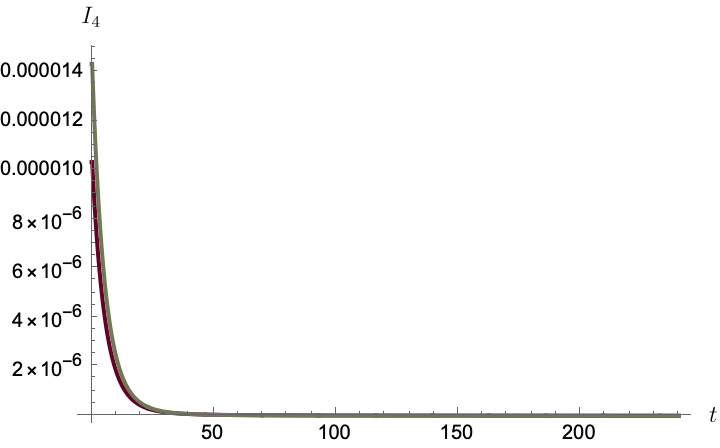
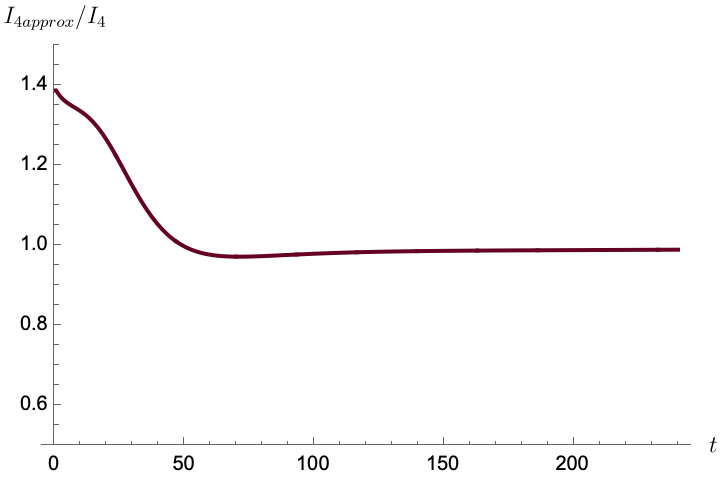

In [60]:
I4={};
approxI4={};
ratioI4={};
For[t=1,t<=tgr,t++,
  AppendTo[I4,{t*dt,Sum[uresults[[t]][[i]]^4,{i,1,xgr}]/xgr}];
  AppendTo[approxI4,{t*dt,Sum[approxuresults[[t]][[i]]^4,{i,1,xgr}]/xgr}];
  AppendTo[ratioI4,{t*dt,Sum[approxuresults[[t]][[i]]^4,{i,1,xgr}]/Sum[uresults[[t]][[i]]^4,{i,1,xgr}]}]
];

graph9=ListLinePlot[{I4,approxI4},DataRange->{tMin,tMax},PlotRange->All,PlotStyle->{brown,green},
 AxesLabel->MaTeX[{"t","I_4"}]]
graph10=ListLinePlot[ratioI4,DataRange->{tMin,tMax},PlotRange->{0.5,1.5},PlotStyle->brown,
 AxesLabel->MaTeX[{"t","I_{4{approx}}/I_4"}]]

Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.00694444], 
 
>       AbsoluteThickness[2], FontSize -> 12, RGBColor[0.392157, 0.00392157, 0.145098]], 
 
>      Directive[PointSize[0.00694444], AbsoluteThickness[2], FontSize -> 12, 
 
>       Dashing[{Small, Small}], RGBColor[0.431373, 0.47451, 0.333333]]}, {β, β      }, 
                                                                               approx
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> {}, LegendLayout -> Column], {Right, Center}, Identity]]
beta2.pdf
-Graphics-
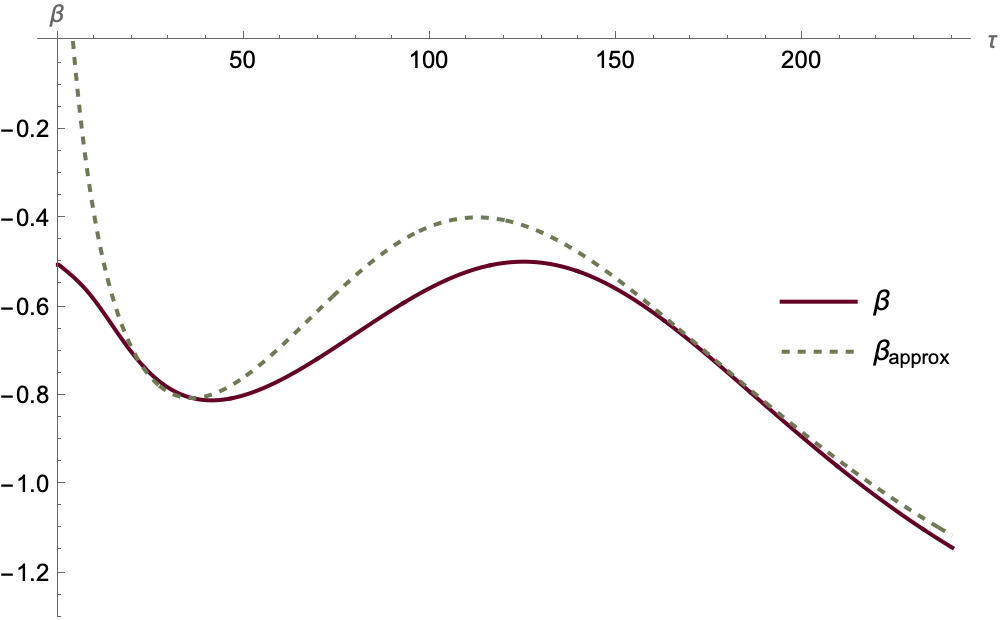
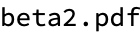
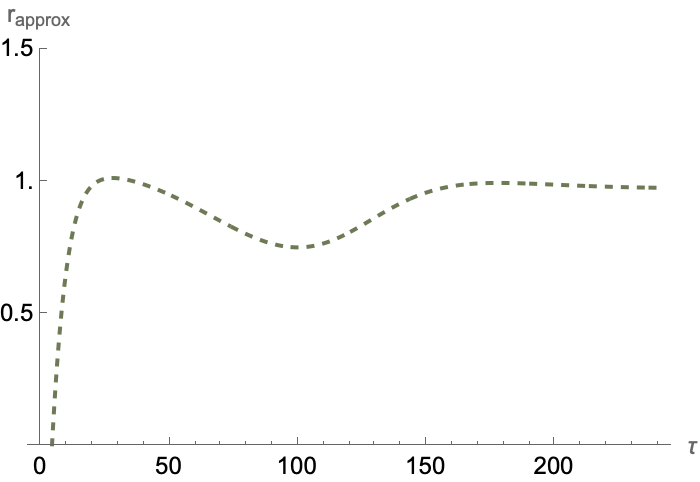

In [247]:
beta={};
approxbeta={};
ratiobeta={};
For[t=1,t<=tgr,t++,
  beta1=Sum[uresults[[t]][[i]]^4,{i,1,xgr}]*xgr/Sum[uresults[[t]][[i]]^2,{i,1,xgr}]^2-3;
  beta2=Sum[approxuresults[[t]][[i]]^4,{i,1,xgr}]*xgr/Sum[approxuresults[[t]][[i]]^2,{i,1,xgr}]^2-3;
  AppendTo[beta,{t*dt,beta1}];
  AppendTo[approxbeta,{t*dt,beta2}];
  AppendTo[ratiobeta,{t*dt,beta2/beta1}]
];

graph11=ListLinePlot[{beta,approxbeta},DataRange->{tMin,tMax},PlotRange->{-1.3,0},BaseStyle->{FontSize->12},PlotStyle->{brown,{Dashed,green}},ImageSize->500,PlotStyle->{brown,green},PlotRangeClipping->False,
 PlotLegends->Placed[LineLegend[{"\[Beta]",Subscript["\[Beta]","approx"]}],{Right,Center}],AxesLabel->{"\[Tau]","\[Beta]"}]
Export["beta2.pdf",%]
graph12=ListLinePlot[ratiobeta,DataRange->{tMin,tMax},PlotRange->{0,1.5},BaseStyle->{FontSize->12},ImageSize->350,PlotStyle->{Dashed,green},PlotRangeClipping->False,
 Ticks->{Automatic,{0,0.5,1.0,1.5}},AxesLabel->{"\[Tau]",Subscript["r","approx"]}]

Show::gtype: Symbol is not a type of graphics.

Show::gcomb: Could not combine the graphics objects in Show[graph6, -Graphics-].

Show::gtype: Symbol is not a type of graphics.

Show::gcomb: Could not combine the graphics objects in Show[graph10, -Graphics-].

Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.00694444], 
 
>       AbsoluteThickness[2], FontSize -> 12, RGBColor[0.392157, 0.00392157, 0.145098]], 
 
>      Directive[PointSize[0.00694444], AbsoluteThickness[2], FontSize -> 12, 
 
>       Dashing[{Small, Small}], RGBColor[0.431373, 0.47451, 0.333333]]}, {β, β      }, 
                                                                               approx
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> {}, LegendLayout -> Column], {Left, Bottom}, Identity]]
flatness.png
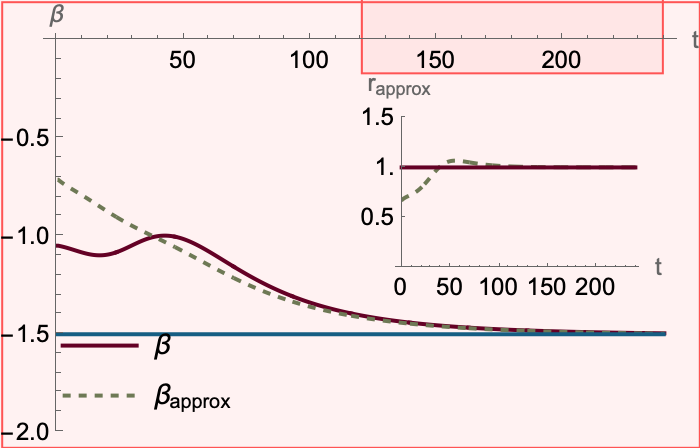
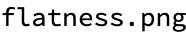

In [578]:
(* 論文用グラフ作成 *)
betaBL=Plot[-1.5,{t,0,240},PlotStyle->blue];
plotr=Plot[1,{t,0,240},PlotStyle->brown];
g1=Show[graph11,betaBL];
g2=Show[graph5];
g3=Show[graph6,plotr];
g4=Show[graph9];
g5=Show[graph10,plotr];
g6=Show[graph12,plotr];
g7=Show[g1,Graphics[Inset[g6,{120,-0.17},{Center},{120,1.2}]]]
Export["flatness.png",g7]